We need to figure out what is the minimum permissable fraction of unmasked spaxels that will still result in a good fit, if the `smoothness_score` $> 1.85$ for the full map but $< 1.85$ for the map requiring S/N $> 5$.

In [21]:
from astropy.table import Table

import numpy as np
import numpy.ma as ma

import datetime

import matplotlib.pyplot as plt
%matplotlib notebook

import sys
sys.path.insert(1,"/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/")
from DRP_rotation_curve import extract_data
from DRP_vel_map import fit_vel_map
from DRP_vel_map_functions import build_map_mask
from file_io import fillin_output_table

In [4]:
MANGA_FOLDER = '/Users/kellydouglass/Documents/Research/data/SDSS/dr16/manga/spectro/'
#MANGA_FOLDER = '/home/kelly/Documents/Data/SDSS/dr16/manga/spectro/'
VEL_MAP_FOLDER = MANGA_FOLDER + 'analysis/v2_4_3/2.2.1/HYB10-GAU-MILESHC/'

In [2]:
fits_filename = '../spirals/DRP_vel_map_results_BB_smooth_lt_1p85_v6.fits'

fits = Table.read(fits_filename, format='fits')

# Calculate the fraction of unmasked spaxels for the fitted map

In [7]:
fits['frac_unmasked'] = -1.

for i in range(len(fits)):
    
    # plate-IFU of current galaxy
    gal_ID = fits['plateifu'][i]
    
    # Read in necessary data
    Ha_vel, Ha_vel_ivar, Ha_vel_mask, r_band, r_band_ivar, Ha_flux, Ha_flux_ivar, Ha_flux_mask, Ha_sigma, Ha_sigma_ivar, Ha_sigma_mask = extract_data(VEL_MAP_FOLDER, gal_ID)

    if Ha_vel is not None:
        # Build mask used for the best fit
        fit_mask = build_map_mask(gal_ID, 
                                  fits['fit_flag'][i], 
                                  ma.array(Ha_vel, mask=Ha_vel_mask), 
                                  ma.array(Ha_flux, mask=Ha_flux_mask), 
                                  ma.array(Ha_flux_ivar, mask=Ha_flux_mask), 
                                  ma.array(Ha_sigma, mask=Ha_sigma_mask))

        # Calculate fraction of masked spaxels
        N_tot = Ha_vel.shape[0]*Ha_vel.shape[1]
        N_unmasked = np.sum(~fit_mask)
        fits['frac_unmasked'][i] = N_unmasked/N_tot

9118-12701 data file does not exist.
8705-12701 data file does not exist.
9680-12701 data file does not exist.
8560-12701 data file does not exist.
8480-12701 data file does not exist.
9801-12701 data file does not exist.
9116-12701 data file does not exist.
9071-12701 data file does not exist.
9807-12701 data file does not exist.
9730-12701 data file does not exist.
9063-12701 data file does not exist.
8811-12701 data file does not exist.
8679-12701 data file does not exist.
9684-12701 data file does not exist.
9663-12701 data file does not exist.
9126-12701 data file does not exist.
9530-12701 data file does not exist.
8672-12701 data file does not exist.
8922-12701 data file does not exist.
9686-12701 data file does not exist.
9127-12701 data file does not exist.
9123-12701 data file does not exist.
8035-12701 data file does not exist.
9687-12701 data file does not exist.
9669-12701 data file does not exist.
8638-12701 data file does not exist.
8704-12701 data file does not exist.
9

8899-12701 data file does not exist.
8901-12701 data file does not exist.
9679-12701 data file does not exist.
8117-12701 data file does not exist.
10020-12701 data file does not exist.
9729-12701 data file does not exist.
8479-12701 data file does not exist.
9264-12701 data file does not exist.
8658-12701 data file does not exist.
9128-12701 data file does not exist.
9681-12701 data file does not exist.
8908-12701 data file does not exist.
9125-12701 data file does not exist.
9660-12701 data file does not exist.
9659-12701 data file does not exist.
8635-12701 data file does not exist.
9802-12701 data file does not exist.
9800-12701 data file does not exist.
8964-12701 data file does not exist.
9861-12701 data file does not exist.
8706-12701 data file does not exist.
8904-12701 data file does not exist.
9726-12701 data file does not exist.
8118-12701 data file does not exist.
9012-12701 data file does not exist.
9098-12701 data file does not exist.
8924-12701 data file does not exist.


9007-12702 data file does not exist.
8906-12702 data file does not exist.
9804-12702 data file does not exist.
9291-12702 data file does not exist.
8560-12702 data file does not exist.
9680-12702 data file does not exist.
8974-12702 data file does not exist.
9126-12702 data file does not exist.
9530-12702 data file does not exist.
9023-12702 data file does not exist.
8811-12702 data file does not exist.
9245-12702 data file does not exist.
8694-12702 data file does not exist.
8882-12702 data file does not exist.
9294-12702 data file does not exist.
8052-12702 data file does not exist.
9533-12702 data file does not exist.
9013-12702 data file does not exist.
8806-12702 data file does not exist.
9071-12702 data file does not exist.
9116-12702 data file does not exist.
9306-12702 data file does not exist.
9668-12702 data file does not exist.
8679-12702 data file does not exist.
8972-12702 data file does not exist.
9663-12702 data file does not exist.
8774-12702 data file does not exist.
8

8039-12702 data file does not exist.
9125-12702 data file does not exist.
8104-12702 data file does not exist.
8691-12702 data file does not exist.
8112-12702 data file does not exist.
8928-12702 data file does not exist.
8667-12702 data file does not exist.
9119-12702 data file does not exist.
8815-12702 data file does not exist.
8893-12702 data file does not exist.
9477-12702 data file does not exist.
8915-12702 data file does not exist.
8658-12702 data file does not exist.
8880-12702 data file does not exist.
9009-12702 data file does not exist.
8916-12702 data file does not exist.
8798-12702 data file does not exist.
8659-12702 data file does not exist.
9482-12702 data file does not exist.
9301-12702 data file does not exist.
9859-12702 data file does not exist.
9064-12702 data file does not exist.
9112-12702 data file does not exist.
9475-12702 data file does not exist.
8908-12702 data file does not exist.
8809-12702 data file does not exist.
9660-12702 data file does not exist.
9

8041-12703 data file does not exist.
8479-12703 data file does not exist.
9859-12703 data file does not exist.
8691-12703 data file does not exist.
8670-12703 data file does not exist.
9521-12703 data file does not exist.
8039-12703 data file does not exist.
9307-12703 data file does not exist.
8664-12703 data file does not exist.
9305-12703 data file does not exist.
9978-12703 data file does not exist.
8963-12703 data file does not exist.
9773-12703 data file does not exist.
9295-12703 data file does not exist.
8803-12703 data file does not exist.
8682-12703 data file does not exist.
8697-12703 data file does not exist.
9688-12703 data file does not exist.
9264-12703 data file does not exist.
8683-12703 data file does not exist.
9729-12703 data file does not exist.
8117-12703 data file does not exist.
8799-12703 data file does not exist.
10020-12703 data file does not exist.
8635-12703 data file does not exist.
9659-12703 data file does not exist.
9072-12703 data file does not exist.


8662-12703 data file does not exist.
8707-12703 data file does not exist.
9261-12703 data file does not exist.
8046-12703 data file does not exist.
8696-12703 data file does not exist.
8960-12703 data file does not exist.
8556-12703 data file does not exist.
8270-12703 data file does not exist.
8930-12703 data file does not exist.
9802-12703 data file does not exist.
8814-12703 data file does not exist.
9689-12703 data file does not exist.
9014-12703 data file does not exist.
9083-12703 data file does not exist.
9126-12703 data file does not exist.
8268-12703 data file does not exist.
9018-12703 data file does not exist.
8969-12703 data file does not exist.
9017-12703 data file does not exist.
9117-12703 data file does not exist.
8812-12703 data file does not exist.
9288-12703 data file does not exist.
8671-12703 data file does not exist.
9680-12703 data file does not exist.
8047-12703 data file does not exist.
9725-12703 data file does not exist.
8698-12703 data file does not exist.
8

9114-12704 data file does not exist.
8905-12704 data file does not exist.
8696-12704 data file does not exist.
9014-12704 data file does not exist.
8969-12704 data file does not exist.
8926-12704 data file does not exist.
9018-12704 data file does not exist.
8040-12704 data file does not exist.
8806-12704 data file does not exist.
9802-12704 data file does not exist.
8972-12704 data file does not exist.
9861-12704 data file does not exist.
8706-12704 data file does not exist.
9542-12704 data file does not exist.
9066-12704 data file does not exist.
8699-12704 data file does not exist.
9261-12704 data file does not exist.
9292-12704 data file does not exist.
9075-12704 data file does not exist.
9120-12704 data file does not exist.
10011-12704 data file does not exist.
8676-12704 data file does not exist.
8930-12704 data file does not exist.
9689-12704 data file does not exist.
8268-12704 data file does not exist.
8962-12704 data file does not exist.
8960-12704 data file does not exist.


9978-12704 data file does not exist.
8685-12704 data file does not exist.
8683-12704 data file does not exist.
8887-12704 data file does not exist.
8924-12704 data file does not exist.
9690-12704 data file does not exist.
8118-12704 data file does not exist.
8678-12704 data file does not exist.
9476-12704 data file does not exist.
8635-12704 data file does not exist.
9012-12704 data file does not exist.
8000-12704 data file does not exist.
9541-12704 data file does not exist.
8897-12704 data file does not exist.
9306-12704 data file does not exist.
8965-12704 data file does not exist.
8808-12704 data file does not exist.
8663-12704 data file does not exist.
9659-12704 data file does not exist.
9676-12705 data file does not exist.
9263-12705 data file does not exist.
8883-12705 data file does not exist.
8637-12705 data file does not exist.
8915-12705 data file does not exist.
9471-12705 data file does not exist.
8702-12705 data file does not exist.
8961-12705 data file does not exist.
9

8480-12705 data file does not exist.
8560-12705 data file does not exist.
9663-12705 data file does not exist.
9071-12705 data file does not exist.
8679-12705 data file does not exist.
9126-12705 data file does not exist.
9013-12705 data file does not exist.
9294-12705 data file does not exist.
9245-12705 data file does not exist.
9520-12705 data file does not exist.
9303-12705 data file does not exist.
9479-12705 data file does not exist.
9124-12705 data file does not exist.
8047-12705 data file does not exist.
8049-12705 data file does not exist.
8968-12705 data file does not exist.
9299-12705 data file does not exist.
8052-12705 data file does not exist.
9683-12705 data file does not exist.
8698-12705 data file does not exist.
9516-12705 data file does not exist.
8923-12705 data file does not exist.
8118-12705 data file does not exist.
9680-12705 data file does not exist.
9304-12705 data file does not exist.
9684-12705 data file does not exist.
9773-12705 data file does not exist.
8

9474-1901 data file does not exist.
9019-1901 data file does not exist.
9662-1901 data file does not exist.
8118-1901 data file does not exist.
9113-1901 data file does not exist.
8685-1901 data file does not exist.
9299-1901 data file does not exist.
9471-1901 data file does not exist.
8114-1901 data file does not exist.
9117-1901 data file does not exist.
8909-1901 data file does not exist.
9466-1901 data file does not exist.
10012-1901 data file does not exist.
9294-1901 data file does not exist.
9682-1901 data file does not exist.
9672-1901 data file does not exist.
8904-1901 data file does not exist.
9130-1901 data file does not exist.
8778-1901 data file does not exist.
8049-1901 data file does not exist.
8902-1901 data file does not exist.
9521-1901 data file does not exist.
9670-1901 data file does not exist.
8556-1901 data file does not exist.
9539-1901 data file does not exist.
8678-1901 data file does not exist.
9544-1901 data file does not exist.
9124-1901 data file does no

9120-1901 data file does not exist.
8660-1901 data file does not exist.
9980-1901 data file does not exist.
8968-1901 data file does not exist.
8661-1901 data file does not exist.
8923-1901 data file does not exist.
8695-1901 data file does not exist.
9071-1901 data file does not exist.
8102-1901 data file does not exist.
8814-1901 data file does not exist.
8895-1901 data file does not exist.
8794-1901 data file does not exist.
9482-1901 data file does not exist.
8698-1901 data file does not exist.
9288-1901 data file does not exist.
8677-1901 data file does not exist.
9516-1901 data file does not exist.
8098-1901 data file does not exist.
8701-1901 data file does not exist.
8667-1901 data file does not exist.
8886-1901 data file does not exist.
8993-1901 data file does not exist.
9532-1901 data file does not exist.
9258-1901 data file does not exist.
9683-1901 data file does not exist.
9133-1901 data file does not exist.
8120-1901 data file does not exist.
8051-1901 data file does not

8264-1902 data file does not exist.
8688-1902 data file does not exist.
9075-1902 data file does not exist.
10011-1902 data file does not exist.
9067-1902 data file does not exist.
8912-1902 data file does not exist.
8802-1902 data file does not exist.
9778-1902 data file does not exist.
9305-1902 data file does not exist.
8631-1902 data file does not exist.
8925-1902 data file does not exist.
8960-1902 data file does not exist.
8883-1902 data file does not exist.
9012-1902 data file does not exist.
9257-1902 data file does not exist.
8969-1902 data file does not exist.
8104-1902 data file does not exist.
9542-1902 data file does not exist.
9018-1902 data file does not exist.
8904-1902 data file does not exist.
9802-1902 data file does not exist.
8773-1902 data file does not exist.
8706-1902 data file does not exist.
8796-1902 data file does not exist.
9119-1902 data file does not exist.
9861-1902 data file does not exist.
9690-1902 data file does not exist.
8043-1902 data file does no

8034-1902 data file does not exist.
9116-1902 data file does not exist.
9680-1902 data file does not exist.
8116-1902 data file does not exist.
8630-1902 data file does not exist.
8970-1902 data file does not exist.
8560-1902 data file does not exist.
8699-1902 data file does not exist.
8916-1902 data file does not exist.
8269-1902 data file does not exist.
8697-1902 data file does not exist.
9009-1902 data file does not exist.
8691-1902 data file does not exist.
9295-1902 data file does not exist.
7444-1902 data file does not exist.
8701-1902 data file does not exist.
9128-1902 data file does not exist.
8665-1902 data file does not exist.
9072-1902 data file does not exist.
9664-1902 data file does not exist.
9263-1902 data file does not exist.
8670-1902 data file does not exist.
9661-1902 data file does not exist.
8799-1902 data file does not exist.
8807-1902 data file does not exist.
8896-1902 data file does not exist.
8961-1902 data file does not exist.
8660-1902 data file does not

9009-3701 data file does not exist.
7995-3701 data file does not exist.
9245-3701 data file does not exist.
8661-3701 data file does not exist.
8804-3701 data file does not exist.
9692-3701 data file does not exist.
8700-3701 data file does not exist.
9671-3701 data file does not exist.
8676-3701 data file does not exist.
8805-3701 data file does not exist.
8270-3701 data file does not exist.
8101-3701 data file does not exist.
8268-3701 data file does not exist.
8680-3701 data file does not exist.
8925-3701 data file does not exist.
9860-3701 data file does not exist.
8962-3701 data file does not exist.
9065-3701 data file does not exist.
8708-3701 data file does not exist.
8812-3701 data file does not exist.
8558-3701 data file does not exist.
8674-3701 data file does not exist.
9669-3701 data file does not exist.
9686-3701 data file does not exist.
9261-3701 data file does not exist.
8797-3701 data file does not exist.
8905-3701 data file does not exist.
7998-3701 data file does not

9975-3702 data file does not exist.
8781-3702 data file does not exist.
9245-3702 data file does not exist.
9482-3702 data file does not exist.
9804-3702 data file does not exist.
9729-3702 data file does not exist.
9976-3702 data file does not exist.
9064-3702 data file does not exist.
9532-3702 data file does not exist.
8966-3702 data file does not exist.
8805-3702 data file does not exist.
8146-3702 data file does not exist.
9112-3702 data file does not exist.
9730-3702 data file does not exist.
9676-3702 data file does not exist.
9658-3702 data file does not exist.
9023-3702 data file does not exist.
9084-3702 data file does not exist.
8121-3702 data file does not exist.
8880-3702 data file does not exist.
8917-3702 data file does not exist.
8899-3702 data file does not exist.
8695-3702 data file does not exist.
8045-3702 data file does not exist.
9803-3702 data file does not exist.
9688-3702 data file does not exist.
9110-3702 data file does not exist.
8879-3702 data file does not

9680-3702 data file does not exist.
8037-3702 data file does not exist.
8882-3702 data file does not exist.
9111-3702 data file does not exist.
8971-3702 data file does not exist.
8113-3702 data file does not exist.
8705-3702 data file does not exist.
9802-3702 data file does not exist.
8043-3702 data file does not exist.
8630-3702 data file does not exist.
8266-3702 data file does not exist.
8560-3702 data file does not exist.
8970-3702 data file does not exist.
9540-3702 data file does not exist.
8116-3702 data file does not exist.
9071-3702 data file does not exist.
8104-3702 data file does not exist.
9080-3702 data file does not exist.
9775-3702 data file does not exist.
8929-3702 data file does not exist.
9299-3702 data file does not exist.
8887-3702 data file does not exist.
9531-3702 data file does not exist.
9672-3702 data file does not exist.
8688-3702 data file does not exist.
8963-3702 data file does not exist.
9262-3702 data file does not exist.
9019-3702 data file does not

9132-3703 data file does not exist.
9084-3703 data file does not exist.
8815-3703 data file does not exist.
8926-3703 data file does not exist.
8665-3703 data file does not exist.
8883-3703 data file does not exist.
10009-3703 data file does not exist.
8673-3703 data file does not exist.
8928-3703 data file does not exist.
9065-3703 data file does not exist.
8104-3703 data file does not exist.
8881-3703 data file does not exist.
9263-3703 data file does not exist.
8889-3703 data file does not exist.
8972-3703 data file does not exist.
9775-3703 data file does not exist.
8043-3703 data file does not exist.
7998-3703 data file does not exist.
8661-3703 data file does not exist.
8689-3703 data file does not exist.
9111-3703 data file does not exist.
8700-3703 data file does not exist.
9541-3703 data file does not exist.
9977-3703 data file does not exist.
8971-3703 data file does not exist.
9858-3703 data file does not exist.
9017-3703 data file does not exist.
8686-3703 data file does no

8953-3703 data file does not exist.
9685-3703 data file does not exist.
9291-3703 data file does not exist.
8907-3703 data file does not exist.
9004-3703 data file does not exist.
8109-3703 data file does not exist.
9975-3703 data file does not exist.
9006-3703 data file does not exist.
9671-3703 data file does not exist.
8112-3703 data file does not exist.
8894-3703 data file does not exist.
8045-3703 data file does not exist.
8680-3703 data file does not exist.
9692-3703 data file does not exist.
8923-3703 data file does not exist.
8702-3703 data file does not exist.
9683-3703 data file does not exist.
9133-3703 data file does not exist.
9007-3703 data file does not exist.
8640-3703 data file does not exist.
8814-3703 data file does not exist.
8968-3703 data file does not exist.
8698-3703 data file does not exist.
8967-3703 data file does not exist.
9260-3703 data file does not exist.
9532-3703 data file does not exist.
8667-3703 data file does not exist.
9727-3703 data file does not

8034-3704 data file does not exist.
9115-3704 data file does not exist.
9671-3704 data file does not exist.
8892-3704 data file does not exist.
9531-3704 data file does not exist.
9008-3704 data file does not exist.
8781-3704 data file does not exist.
9478-3704 data file does not exist.
9676-3704 data file does not exist.
8037-3704 data file does not exist.
9072-3704 data file does not exist.
9263-3704 data file does not exist.
8885-3704 data file does not exist.
8973-3704 data file does not exist.
10008-3704 data file does not exist.
8681-3704 data file does not exist.
8776-3704 data file does not exist.
8971-3704 data file does not exist.
8690-3704 data file does not exist.
9780-3704 data file does not exist.
8677-3704 data file does not exist.
8777-3704 data file does not exist.
9084-3704 data file does not exist.
9117-3704 data file does not exist.
9682-3704 data file does not exist.
9260-3704 data file does not exist.
9113-3704 data file does not exist.
9262-3704 data file does no

9730-3704 data file does not exist.
8266-3704 data file does not exist.
9080-3704 data file does not exist.
8659-3704 data file does not exist.
8113-3704 data file does not exist.
8672-3704 data file does not exist.
8929-3704 data file does not exist.
8810-3704 data file does not exist.
7997-3704 data file does not exist.
8041-3704 data file does not exist.
8965-3704 data file does not exist.
9007-3704 data file does not exist.
8897-3704 data file does not exist.
8813-3704 data file does not exist.
9468-3704 data file does not exist.
9978-3704 data file does not exist.
9069-3704 data file does not exist.
8683-3704 data file does not exist.
8680-3704 data file does not exist.
9692-3704 data file does not exist.
9673-3704 data file does not exist.
8894-3704 data file does not exist.
8923-3704 data file does not exist.
8816-3704 data file does not exist.
8921-3704 data file does not exist.
8704-3704 data file does not exist.
8907-3704 data file does not exist.
8634-3704 data file does not

9064-6101 data file does not exist.
9243-6101 data file does not exist.
8663-6101 data file does not exist.
8778-6101 data file does not exist.
8268-6101 data file does not exist.
8904-6101 data file does not exist.
9725-6101 data file does not exist.
8812-6101 data file does not exist.
9476-6101 data file does not exist.
9011-6101 data file does not exist.
9248-6101 data file does not exist.
9118-6101 data file does not exist.
9520-6101 data file does not exist.
9114-6101 data file does not exist.
9018-6101 data file does not exist.
9292-6101 data file does not exist.
9466-6101 data file does not exist.
8676-6101 data file does not exist.
9080-6101 data file does not exist.
8707-6101 data file does not exist.
8887-6101 data file does not exist.
8924-6101 data file does not exist.
8041-6101 data file does not exist.
9019-6101 data file does not exist.
8679-6101 data file does not exist.
9690-6101 data file does not exist.
9012-6101 data file does not exist.
8802-6101 data file does not

9978-6102 data file does not exist.
9542-6102 data file does not exist.
9083-6102 data file does not exist.
8679-6102 data file does not exist.
9669-6102 data file does not exist.
9305-6102 data file does not exist.
9860-6102 data file does not exist.
8034-6102 data file does not exist.
8048-6102 data file does not exist.
9063-6102 data file does not exist.
8271-6102 data file does not exist.
9666-6102 data file does not exist.
8811-6102 data file does not exist.
8685-6102 data file does not exist.
9520-6102 data file does not exist.
8906-6102 data file does not exist.
9298-6102 data file does not exist.
9680-6102 data file does not exist.
8918-6102 data file does not exist.
9466-6102 data file does not exist.
9098-6102 data file does not exist.
9116-6102 data file does not exist.
9080-6102 data file does not exist.
9011-6102 data file does not exist.
10008-6102 data file does not exist.
8663-6102 data file does not exist.
7997-6102 data file does not exist.
8778-6102 data file does no

9304-6102 data file does not exist.
8631-6102 data file does not exist.
8961-6102 data file does not exist.
9477-6102 data file does not exist.
8660-6102 data file does not exist.
8807-6102 data file does not exist.
8677-6102 data file does not exist.
8681-6102 data file does not exist.
8000-6102 data file does not exist.
8799-6102 data file does not exist.
8689-6102 data file does not exist.
9263-6102 data file does not exist.
9674-6102 data file does not exist.
9780-6102 data file does not exist.
9009-6102 data file does not exist.
9072-6102 data file does not exist.
9676-6102 data file does not exist.
9084-6102 data file does not exist.
9688-6102 data file does not exist.
9110-6102 data file does not exist.
9021-6102 data file does not exist.
8670-6102 data file does not exist.
8687-6102 data file does not exist.
9541-6102 data file does not exist.
9306-6102 data file does not exist.
7995-6102 data file does not exist.
8806-6102 data file does not exist.
8699-6102 data file does not

8631-6103 data file does not exist.
8110-6103 data file does not exist.
8808-6103 data file does not exist.
8806-6103 data file does not exist.
9539-6103 data file does not exist.
9662-6103 data file does not exist.
9544-6103 data file does not exist.
8909-6103 data file does not exist.
8669-6103 data file does not exist.
8036-6103 data file does not exist.
9073-6103 data file does not exist.
8881-6103 data file does not exist.
8692-6103 data file does not exist.
8659-6103 data file does not exist.
10009-6103 data file does not exist.
9858-6103 data file does not exist.
8636-6103 data file does not exist.
7444-6103 data file does not exist.
9779-6103 data file does not exist.
8699-6103 data file does not exist.
9306-6103 data file does not exist.
8773-6103 data file does not exist.
9075-6103 data file does not exist.
8930-6103 data file does not exist.
9689-6103 data file does not exist.
9006-6103 data file does not exist.
7996-6103 data file does not exist.
8668-6103 data file does no

8924-6103 data file does not exist.
9130-6103 data file does not exist.
8638-6103 data file does not exist.
8906-6103 data file does not exist.
9123-6103 data file does not exist.
8035-6103 data file does not exist.
8778-6103 data file does not exist.
9127-6103 data file does not exist.
9011-6103 data file does not exist.
8685-6103 data file does not exist.
8913-6103 data file does not exist.
9681-6103 data file does not exist.
8679-6103 data file does not exist.
9976-6103 data file does not exist.
8667-6103 data file does not exist.
8703-6103 data file does not exist.
9113-6103 data file does not exist.
8049-6103 data file does not exist.
8971-6103 data file does not exist.
8972-6103 data file does not exist.
8895-6103 data file does not exist.
9098-6103 data file does not exist.
9260-6103 data file does not exist.
8637-6103 data file does not exist.
9110-6103 data file does not exist.
8048-6103 data file does not exist.
8702-6103 data file does not exist.
8964-6103 data file does not

8794-6104 data file does not exist.
8661-6104 data file does not exist.
8673-6104 data file does not exist.
8806-6104 data file does not exist.
8695-6104 data file does not exist.
8893-6104 data file does not exist.
8801-6104 data file does not exist.
9475-6104 data file does not exist.
8267-6104 data file does not exist.
9772-6104 data file does not exist.
8115-6104 data file does not exist.
8686-6104 data file does not exist.
8920-6104 data file does not exist.
9977-6104 data file does not exist.
9064-6104 data file does not exist.
8116-6104 data file does not exist.
8808-6104 data file does not exist.
9306-6104 data file does not exist.
8880-6104 data file does not exist.
9980-6104 data file does not exist.
8971-6104 data file does not exist.
8968-6104 data file does not exist.
8930-6104 data file does not exist.
8782-6104 data file does not exist.
9531-6104 data file does not exist.
9517-6104 data file does not exist.
8892-6104 data file does not exist.
9478-6104 data file does not

8266-6104 data file does not exist.
9051-6104 data file does not exist.
9659-6104 data file does not exist.
8670-6104 data file does not exist.
9672-6104 data file does not exist.
7995-6104 data file does not exist.
8685-6104 data file does not exist.
9080-6104 data file does not exist.
9466-6104 data file does not exist.
8781-6104 data file does not exist.
9011-6104 data file does not exist.
8816-6104 data file does not exist.
8264-6104 data file does not exist.
9685-6104 data file does not exist.
9691-6104 data file does not exist.
8635-6104 data file does not exist.
9675-6104 data file does not exist.
8581-6104 data file does not exist.
9468-6104 data file does not exist.
8109-6104 data file does not exist.
9540-6104 data file does not exist.
9687-6104 data file does not exist.
8897-6104 data file does not exist.
8907-6104 data file does not exist.
9521-6104 data file does not exist.
9978-6104 data file does not exist.
8963-6104 data file does not exist.
9678-6104 data file does not

9473-9101 data file does not exist.
8897-9101 data file does not exist.
9669-9101 data file does not exist.
8975-9101 data file does not exist.
8635-9101 data file does not exist.
9659-9101 data file does not exist.
8631-9101 data file does not exist.
8101-9101 data file does not exist.
8114-9101 data file does not exist.
9011-9101 data file does not exist.
9861-9101 data file does not exist.
9682-9101 data file does not exist.
9542-9101 data file does not exist.
9262-9101 data file does not exist.
9466-9101 data file does not exist.
9012-9101 data file does not exist.
9130-9101 data file does not exist.
8906-9101 data file does not exist.
9083-9101 data file does not exist.
8778-9101 data file does not exist.
8924-9101 data file does not exist.
8804-9101 data file does not exist.
9860-9101 data file does not exist.
8777-9101 data file does not exist.
8099-9101 data file does not exist.
8901-9101 data file does not exist.
10020-9101 data file does not exist.
8098-9101 data file does no

8967-9102 data file does not exist.
9084-9102 data file does not exist.
9804-9102 data file does not exist.
8896-9102 data file does not exist.
8911-9102 data file does not exist.
9726-9102 data file does not exist.
8659-9102 data file does not exist.
8581-9102 data file does not exist.
8109-9102 data file does not exist.
9023-9102 data file does not exist.
8907-9102 data file does not exist.
9685-9102 data file does not exist.
9133-9102 data file does not exist.
8045-9102 data file does not exist.
9684-9102 data file does not exist.
9691-9102 data file does not exist.
8682-9102 data file does not exist.
8908-9102 data file does not exist.
9692-9102 data file does not exist.
8479-9102 data file does not exist.
9080-9102 data file does not exist.
8117-9102 data file does not exist.
9051-9102 data file does not exist.
8899-9102 data file does not exist.
9801-9102 data file does not exist.
8664-9102 data file does not exist.
8102-9102 data file does not exist.
8111-9102 data file does not

8901-9102 data file does not exist.
10020-9102 data file does not exist.
8658-9102 data file does not exist.
9681-9102 data file does not exist.
9660-9102 data file does not exist.
9125-9102 data file does not exist.
8803-9102 data file does not exist.
8039-9102 data file does not exist.
9079-9102 data file does not exist.
8809-9102 data file does not exist.
8902-9102 data file does not exist.
9661-9102 data file does not exist.
9517-9102 data file does not exist.
8557-9102 data file does not exist.
8121-9102 data file does not exist.
9468-9102 data file does not exist.
9521-9102 data file does not exist.
8963-9102 data file does not exist.
8897-9102 data file does not exist.
8635-9102 data file does not exist.
9659-9102 data file does not exist.
8782-9102 data file does not exist.
8684-9102 data file does not exist.
8882-9102 data file does not exist.
9533-9102 data file does not exist.
8795-9102 data file does not exist.
8953-9102 data file does not exist.
9291-9102 data file does no

### For objects with `smoothness_score` $\leq 1.85$, what is the distribution of unmasked pixels?

<IPython.core.display.Javascript object>


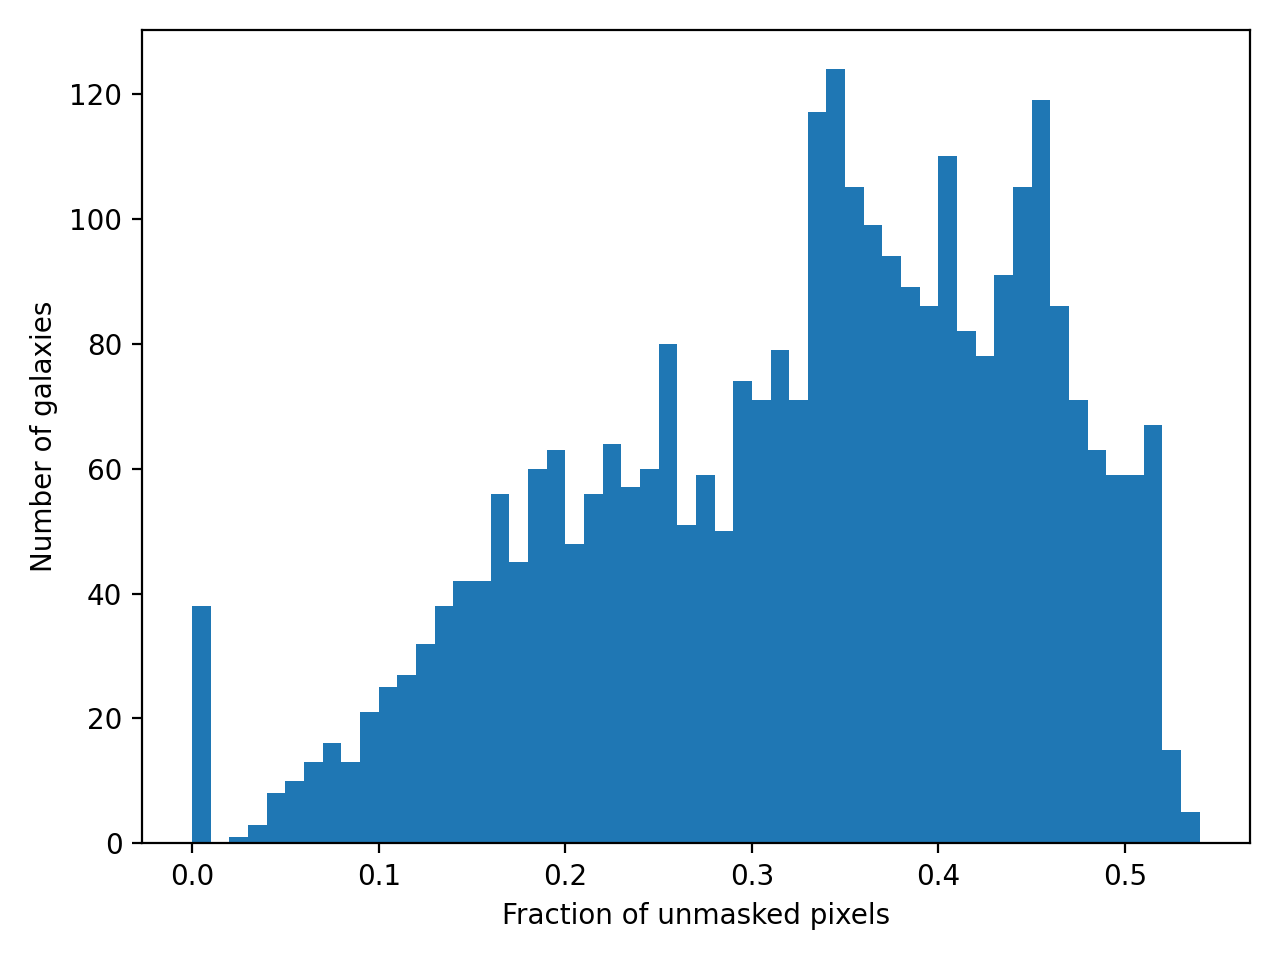

In [13]:
plt.figure()

plt.hist(fits['frac_unmasked'][fits['smoothness_score'] <= 1.85], 
         bins=np.arange(0, 0.55, 0.01))

plt.xlabel('Fraction of unmasked pixels')
plt.ylabel('Number of galaxies')

plt.tight_layout();

Which objects are in the lowest bin?

In [16]:
fits[(fits['frac_unmasked'] <= 0.01) & (fits['smoothness_score'] <= 1.85)].show_in_notebook()

idx,plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7],v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,r_turn,r_turn_err,v_max,v_max_err,chi2,alpha,alpha_err,nsa_elpetro_th90,fit_flag,smoothness_score,M,M_err,frac_unmasked
0,8724,12701,8724-12701,1-47305,v2_4_3,v2_4_3,v1_6_2,v5_5_32,v2_5,APOGEE-2&MaNGA,MaNGA dither,130.335246061,53.9386514555,164.177352666,37.6128630714,130.33525,53.938651,0.0284307,9,8100.89,0,29.5485,58.8618,ma079,22,3,9129,131.16264,54.829193,1.0725,1.07665,1.12181,1.27,1.59682,1.76166,0.862631,0.881406,0.89552,57427,57427,57428,2.53941,2.50803,2.49909,2.48295,1168,0,0,1,plateTargets-1.par,6088,J084120.45+535619.1,127,271,0,0.031606,0.0255484,0.0344234,0.0516239,0.0564757,0.0229167,0.036587,0.67973,0.808824,0.33788,0.364529,-999.0,-999.0,0.528786,0.276671,0.294288,54,1411,3,v1_0_1,50348,-999,0.031606,0.0319435,-16.7193 .. -21.177,-17.3044 .. -21.0875,20.5147 .. 1008.16,22961100000.0,20028700000.0,0.594479,152.131,0.244515 .. 0.0436233,13.0768,10.5741,53.4287 .. 2741.19,0.00490031 .. 0.00153046,70.0837 .. 2808.39,0.00509068 .. 0.00162633,0.519512,0.695127,150.118,14.1947,41.0667 .. 3044.49,0.022242 .. 0.00750787,1099.9999341026983,1.5763437423533497,0.0005086631496838668,0.9999853417602129,46.99994744944878,0.06655532721785914,46.999959653039994,0.011207644166535958,365.726050534997,0.41831138546137187,99.99994785732967,9.472937600599648,5099.999941764548,165.21971564719405,-375.37739264398715,85.41037933098737,0.45199623906389286,25.74871063232422,-4.0,0.45220426260840446,12.000342223649108,9.442526137940352,0.00018261504747991235
1,9088,12702,9088-12702,1-265589,v2_4_3,v2_4_3,v1_6_2,v5_5_32,v2_5,APOGEE-2&MaNGA,MaNGA dither,242.315473709,25.7124695732,42.7975370634,45.9776967072,242.31547,25.71247,0.0642593,12,10800.9,0,25.9815,62.6294,ma112,25,5,9678,242.61861,26.105814,1.00796,1.0511,1.18798,1.24041,1.41773,1.48626,0.665548,0.846967,0.859859,57876,57876,57877,2.53442,2.53117,2.52517,2.51506,1040,0,0,1,plateTargets-1.par,7442,J160915.70+254244.8,127,169,0,0.0411658,0.0369215,0.0684054,0.098276,0.109092,0.0352429,0.0705269,0.67973,0.074085,0.0370911,0.0395721,-999.0,-999.0,0.0652274,0.0347299,0.0368959,221,4002,6,v1_0_1,281018,-999,0.0411658,0.0414062,-16.6585 .. -22.8296,-17.1817 .. -22.5651,2.60807 .. 1024.79,103052000000.0,78764500000.0,0.83649,143.843,0.532648 .. 0.0950285,11.183,10.4289,27.9674 .. 5855.01,0.00411894 .. 0.000483805,27.8786 .. 6017.94,0.0039723 .. 0.000429364,0.768697,2.16191,147.42,14.2236,17.6302 .. 7650.65,0.0158593 .. 0.00212329,1099.999934102002,2.834597696076321,0.13128216792349712,0.999999970940905,47.99998597801336,0.04892558549301164,34.37743237735786,0.014458111564625406,182.53494268420704,0.0793559172837873,5.582188142898726,0.030403659107307798,5099.999941764548,4.553290264962669,-23225053.25050657,71.680524933199,11.25024091464636,23.774497985839844,-4.0,0.7542387172154018,13.934623474295208,13.876731332235172,0.001038781163434903
2,8551,12703,8551-12703,1-247858,v2_4_3,v2_4_3,v1_6_2,v5_5_32,v2_5,APOGE

For all of these, it looks like they all need slightly larger bin widths in the AGN mask cut so that they are not masking out all of the points.

In [26]:
list(fits['plateifu'][(fits['frac_unmasked'] <= 0.01) & (fits['smoothness_score'] <= 1.85)])        

['8724-12701',
 '9088-12702',
 '8551-12703',
 '8452-12703',
 '7960-12704',
 '8481-12705',
 '10001-12705',
 '8319-12705',
 '9869-12705',
 '9045-1901',
 '8446-1901',
 '8555-1901',
 '8551-1901',
 '8158-1901',
 '8453-1901',
 '8244-1902',
 '9888-3701',
 '8335-3701',
 '8261-3701',
 '8552-3702',
 '8725-3703',
 '8999-3704',
 '9501-3704',
 '8257-6101',
 '8483-6101',
 '8244-6101',
 '8131-6101',
 '8338-6103',
 '8985-6104',
 '8935-6104',
 '8591-6104',
 '8944-6104',
 '8239-9101',
 '8154-9101',
 '8320-9101',
 '8086-9102',
 '8081-9102',
 '9184-9102']

### Objects with negative $\chi^2$

$\chi^2$ should not be negative.  I was not accounting for this possibility before, so any fits with a negative $\chi^2$ need to be rerun.

In [28]:
list(fits['plateifu'][fits['chi2'] < 0])

['9876-12701',
 '8946-12701',
 '8987-12701',
 '8140-12701',
 '8724-12701',
 '9033-12702',
 '9512-12702',
 '8932-12702',
 '9088-12702',
 '8980-12702',
 '8440-12702',
 '8145-12702',
 '8933-12703',
 '8133-12703',
 '8551-12703',
 '9863-12703',
 '9039-12703',
 '8715-12703',
 '8085-12703',
 '8452-12703',
 '8931-12704',
 '8725-12704',
 '9033-12704',
 '8613-12704',
 '7960-12704',
 '8934-12704',
 '7968-12705',
 '8943-12705',
 '9196-12705',
 '9510-12705',
 '8481-12705',
 '10001-12705',
 '8319-12705',
 '9869-12705',
 '8937-12705',
 '8603-12705',
 '8333-1901',
 '8936-1901',
 '9031-1901',
 '8624-1901',
 '8077-1901',
 '8445-1901',
 '9493-1901',
 '9045-1901',
 '8626-1901',
 '8446-1901',
 '8455-1901',
 '8555-1901',
 '8949-1901',
 '8551-1901',
 '8158-1901',
 '8131-1901',
 '8601-1901',
 '8592-1901',
 '8453-1901',
 '8939-1901',
 '8080-1901',
 '7972-1901',
 '7964-1901',
 '8449-1901',
 '9492-1901',
 '9039-1901',
 '8154-1902',
 '8141-1902',
 '9492-1902',
 '9505-1902',
 '8448-1902',
 '9500-1902',
 '8948-1902